Data Mining - Kelompok 1
1. 2501974385 - Ricky Krisdianto
2. 2540128165 - Hossey Masada
3. 2540129855 - Ivana Apriani
4. 2540130365 - Celina Josephine
5. 2501984511 - Princessa Fortunata Fusanto
6. 2501977286 - Alden Ardiwinata Putra

Dataset: https://www.kaggle.com/datasets/mohaimenalrashid/invistico-airline

# KDD Process for SVM Kernel: Radial Basis Function

In [ ]:
# import main library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import library for machine learning and data mining utilities
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# set pandas utility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# warnings.filterwarnings('ignore')

In [ ]:
# import and read CSV dataset and input as dataframe (df)
df = pd.read_csv('/content/Invistico_Airline.csv')

In [ ]:
# eliminate missing value
df = df.dropna()
df.shape

(129487, 22)

In [ ]:
# convert categorical feature into numerical feature
encoder = LabelEncoder()
df['satisfaction'] = encoder.fit_transform(df['satisfaction'])
df['Customer Type'] = encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = encoder.fit_transform(df['Type of Travel'])
df['Class'] = encoder.fit_transform(df['Class'])

In [ ]:
# drop the highly correlated features
df.drop('Departure Delay in Minutes', axis=1, inplace=True)

In [ ]:
df['satisfaction'].value_counts()

1    70882
0    58605
Name: satisfaction, dtype: int64

In [ ]:
# preparation for machine learning model (normalization by standard scaler and test split)
x = df.drop('satisfaction', axis=1) # features
y = df['satisfaction'] # target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train Data:")
print(y_train.value_counts(), "\n")
print("Test Data:")
print(y_test.value_counts(), "\n")

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

Train Data:
1    56805
0    46784
Name: satisfaction, dtype: int64 

Test Data:
1    14077
0    11821
Name: satisfaction, dtype: int64 



array([[ 2.11476084, -1.21903868, -0.66826021, ...,  0.25590362,
         1.26904953, -0.2639535 ],
       [-0.47286671,  1.22745346, -0.66826021, ...,  1.12575758,
         1.26904953, -0.39493727],
       [-0.47286671,  0.1033895 , -0.66826021, ..., -0.61395035,
         0.49833755, -0.39493727],
       ...,
       [-0.47286671,  0.30175373,  1.49642308, ...,  0.25590362,
        -1.81379838, -0.15916648],
       [-0.47286671, -1.81413137,  1.49642308, ...,  0.25590362,
        -1.81379838, -0.29015025],
       [-0.47286671, -0.623946  , -0.66826021, ...,  1.12575758,
         1.26904953, -0.39493727]])

In [ ]:
# create SVM model
SVM_model = SVC(kernel='rbf', C=1.0, random_state=42, verbose=True)

In [ ]:
# set hyperparameter for cross-validation (window = 5)
crossValidation = cross_val_score(SVM_model, x_train, y_train, cv=5)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
print("Cross-validation Score: ", crossValidation)

Cross-validation Score:  [0.94232069 0.9431895  0.94154841 0.94429964 0.94284887]


In [ ]:
print("Overall Accuracy: ", format(crossValidation.mean()))

Overall Accuracy:  0.9428414214583268


In [ ]:
# model fitting and predict test data
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)

[LibSVM]

Prediction Accuracy:  0.9447061549154375
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11821
           1       0.95      0.94      0.95     14077

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898

Model Accuracy:  0.9447061549154375


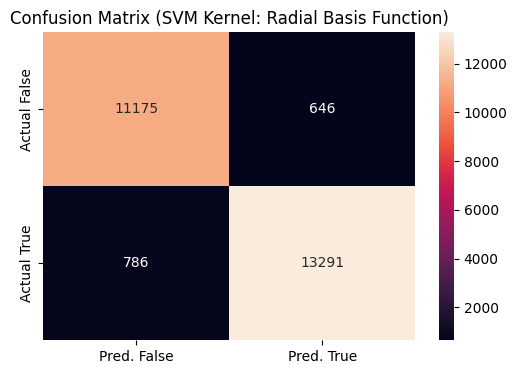

In [ ]:
# model report
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy: ', accuracy)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

modelAccuracy = SVM_model.score(x_test, y_test)
print('Model Accuracy: ', format(modelAccuracy))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual False', 'Actual True'], columns=['Pred. False', 'Pred. True'])

plt.figure(figsize=(6, 4))
plt.title('Confusion Matrix (SVM Kernel: Radial Basis Function)')
sns.heatmap(conf_df, annot=True, fmt='g')
plt.show()

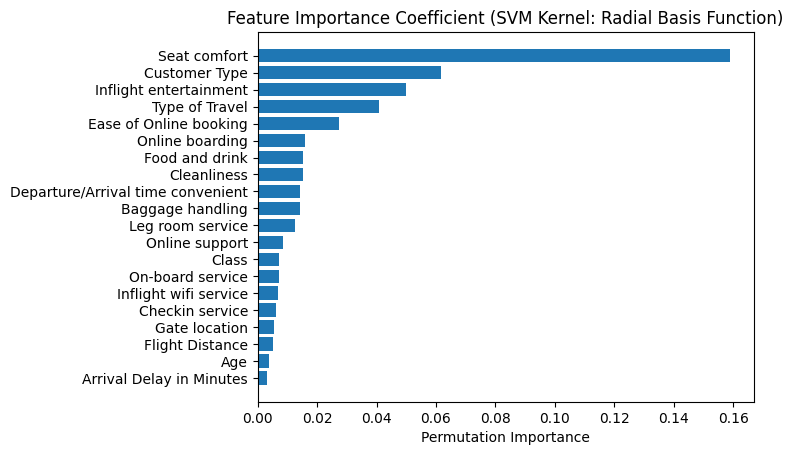

In [ ]:
importance = permutation_importance(SVM_model, x_test, y_test)
features = np.array(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
                     'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                     'Gate location', 'Inflight wifi service', 'Inflight entertainment',
                     'Online support', 'Ease of Online booking', 'On-board service',
                     'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                     'Online boarding', 'Arrival Delay in Minutes'])
sorted_index = importance.importances_mean.argsort()
plt.title("Feature Importance Coefficient (SVM Kernel: Radial Basis Function)")
plt.barh(features[sorted_index], importance.importances_mean[sorted_index])
plt.xlabel("Permutation Importance")
plt.show()